Importation des librairies nécessaires


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Chargement des données

In [4]:
file_path = 'chienloup.csv'
data = pd.read_csv(file_path, sep=';')
print("Aperçu des données chargées:")
print(data.head())

Aperçu des données chargées:
      tu as oSPE  LCB    LSM     LBM  LP    LM    LAM  GENRE
0     BULL-DOG 1   1290    640   950   175   112  138  CHIEN
1     BULL-DOG 2   1540    740   760   200   142  165  CHIEN
2          BOXER   1580    710   710   167   125  133  CHIEN
3  SAINT-BERNARD   2200   1110   880   225   154  180  CHIEN
4    BULL-MASSIF   1900    930   780   197   132  140  CHIEN


création d'histogrammes pour chaque varibles numériques

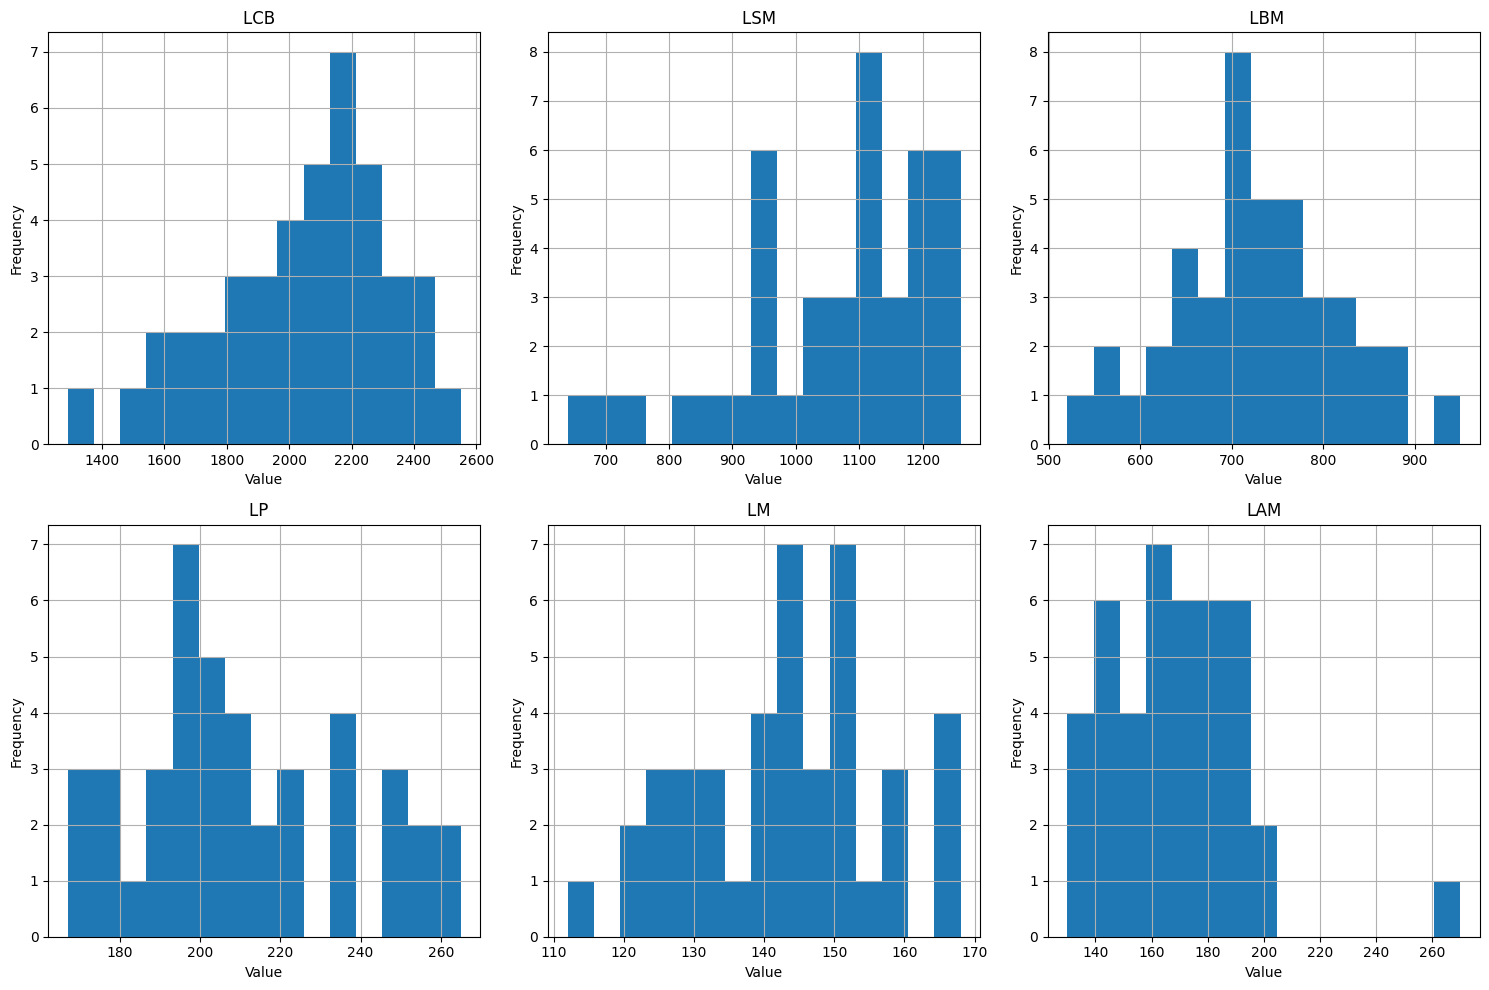

In [5]:
# Plotting histograms for each numerical column
plt.figure(figsize=(15, 10))

for i, column in enumerate(data.columns[1:-1], 1):
    plt.subplot(2, 3, i)
    data[column].hist(bins=15)
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Division des données en sous-groupes basés sur la colonne 'GENRE'

In [6]:
groups = data.groupby('GENRE')

Calcul des matrices de variance-covariance pour chaque sous-groupe


In [7]:
numeric_columns = data.select_dtypes(include=[float, int]).columns
var_cov_matrices = {group: df[numeric_columns].cov() for group, df in groups}

L'analyse de la matrice de covariance globale (V) et des valeurs de discrimination (d) pour les variables de notre jeu de données révèle la capacité de certaines variables à différencier les groupes 'CHIEN' et 'LOUP'. La matrice de covariance indique une forte relation entre certaines variables, comme LCB et LSM, tandis que les valeurs de discrimination montrent que des variables telles que LP et LCB sont efficaces pour distinguer les groupes, avec LP étant particulièrement distincte. En revanche, des valeurs négatives pour LSM et LM suggèrent une faible utilité de ces variables pour la séparation des groupes. En conclusion, certaines variables initiales, notamment LP et LCB, séparent bien les groupes, tandis que d'autres sont moins efficaces pour cette tâche dans l'exemple donné.

Calcul des vecteurs moyens pour chaque sous-groupe


In [8]:
mean_vectors_complete = {group: df[numeric_columns].mean() for group, df in groups}
overall_mean = data[numeric_columns].mean()

Calcul de la matrice de dispersion interclasse B𝑝×𝑝

In [9]:
n = data.shape[0]
B = sum([(mean_vectors_complete[group] - overall_mean).values.reshape(-1, 1) @ 
                       (mean_vectors_complete[group] - overall_mean).values.reshape(1, -1) *
                       groups.get_group(group).shape[0] for group in groups.groups]) / n
print("Matrice de dispersion interclasse B𝑝×𝑝 :")
print(B)

Matrice de dispersion interclasse B𝑝×𝑝 :
[[4480.27777778 3225.3968254  1214.56349206 1448.90873016  630.46428571
  1046.23809524]
 [3225.3968254  2321.99546485  874.37641723 1043.08390023  453.87755102
   753.19727891]
 [1214.56349206  874.37641723  329.25736961  392.78628118  170.91326531
   283.62585034]
 [1448.90873016 1043.08390023  392.78628118  468.5728458   203.89030612
   338.35034014]
 [ 630.46428571  453.87755102  170.91326531  203.89030612   88.71887755
   147.22653061]
 [1046.23809524  753.19727891  283.62585034  338.35034014  147.22653061
   244.31836735]]


Calcul de la matrice de variance intraclasse W𝑝×𝑝

In [10]:
W = sum([groups.get_group(group).shape[0] * var_cov_matrices[group] for group in groups.groups]) / n
print("Matrice de variance intraclasse W𝑝×𝑝 :")
print(W)

Matrice de variance intraclasse W𝑝×𝑝 :
              LCB           LSM            LBM         LP           LM     
LCB    73209.187938  37665.367965  7823.787132  3037.510823  2107.636214  \
LSM    37665.367965  20987.871324  1971.547992  1593.836393  1077.060755   
 LBM    7823.787132   1971.547992  8294.633527   502.741454   271.084490   
LP      3037.510823   1593.836393   502.741454   214.480594   113.606434   
LM      2107.636214   1077.060755   271.084490   113.606434    97.521645   
LAM     3034.309598   1502.937006   528.725183   154.976414   120.159725   

               LAM  
LCB    3034.309598  
LSM    1502.937006  
 LBM    528.725183  
LP      154.976414  
LM      120.159725  
LAM     385.327288  


Calcul de la variance totale V

In [11]:
V = B + W
print("Variance totale V :")
print(V)

Variance totale V :
              LCB           LSM            LBM         LP           LM     
LCB    77689.465716  40890.764791  9038.350624  4486.419553  2738.100500  \
LSM    40890.764791  23309.866789  2845.924409  2636.920294  1530.938306   
 LBM    9038.350624   2845.924409  8623.890897   895.527735   441.997756   
LP      4486.419553   2636.920294   895.527735   683.053440   317.496740   
LM      2738.100500   1530.938306   441.997756   317.496740   186.240523   
LAM     4080.547694   2256.134284   812.351033   493.326755   267.386256   

               LAM  
LCB    4080.547694  
LSM    2256.134284  
 LBM    812.351033  
LP      493.326755  
LM      267.386256  
LAM     629.645655  


Calcul de la valeur de discrimination d pour chaque variable Xj avant projection

In [12]:
# Calcul de l'inverse de la matrice de variance totale V
V_inv = np.linalg.inv(V)

# Calcul de la valeur de discrimination d = V^-1 * B
d = V_inv @ B
print("Valeur de discrimination d pour chaque variable Xj avant projection :")
print(d)

Valeur de discrimination d pour chaque variable Xj avant projection :
[[-1.17000233e-01 -8.42296392e-02 -3.17177235e-02 -3.78375333e-02
  -1.64642623e-02 -2.73219892e-02]
 [ 6.49932516e-03  4.67892925e-03  1.76190930e-03  2.10186275e-03
   9.14584452e-04  1.51772768e-03]
 [-5.05164900e-02 -3.63673269e-02 -1.36945715e-02 -1.63368851e-02
  -7.10867592e-03 -1.17966517e-02]
 [ 2.45735517e+00  1.76907459e+00  6.66167150e-01  7.94701476e-01
   3.45798799e-01  5.73843570e-01]
 [ 5.44294479e-01  3.91843044e-01  1.47553396e-01  1.76023243e-01
   7.65930701e-02  1.27104088e-01]
 [ 3.05284383e-01  2.19777283e-01  8.27598833e-02  9.87280765e-02
   4.29595909e-02  7.12902563e-02]]


Matrice B (Variance Interclasse) :

Des valeurs élevées dans certaines cellules indiquent une différenciation significative entre les groupes pour ces variables spécifiques.

Matrice W (Variance Intraclasse) :

La matrice montre une variabilité considérable au sein des groupes pour chaque variable.

Matrice V (Variance Totale) :

Combinant les variances intra et interclasse, elle montre la variabilité totale pour chaque variable.

Matrice de discrimination d :

Des valeurs élevées positives dans d, notamment dans la quatrième ligne, suggèrent une forte contribution de cette variable à la distinction entre les groupes.
Les valeurs négatives ou plus petites indiquent une contribution moindre à la discrimination.

En conclusion, la quatrième variable ressort comme particulièrement discriminante entre les groupes.

In [13]:
eigenvalues, eigenvectors = np.linalg.eig(d)

eigenvalues, eigenvectors

(array([ 8.16568927e-01+0.00000000e+00j,  1.12918676e-16+4.23589264e-16j,
         1.12918676e-16-4.23589264e-16j, -1.64093198e-16+8.68471931e-17j,
        -1.64093198e-16-8.68471931e-17j, -2.23734131e-18+0.00000000e+00j]),
 array([[ 0.04608905+0.j        , -0.07254389-0.17004688j,
         -0.07254389+0.17004688j, -0.00622464+0.00080238j,
         -0.00622464-0.00080238j, -0.12180638+0.j        ],
        [-0.00256023+0.j        , -0.08035551+0.25270008j,
         -0.08035551-0.25270008j,  0.04353176-0.02132739j,
          0.04353176+0.02132739j,  0.16184409+0.j        ],
        [ 0.01989959+0.j        , -0.03326872+0.0349181j ,
         -0.03326872-0.0349181j ,  0.01668263-0.03259692j,
          0.01668263+0.03259692j,  0.46543082+0.j        ],
        [-0.96800802+0.j        ,  0.03962392-0.11080307j,
          0.03962392+0.11080307j, -0.42496434-0.0209902j ,
         -0.42496434+0.0209902j , -0.74131215+0.j        ],
        [-0.21440996+0.j        ,  0.93542337+0.j        ,
     

étude de la diagonalisibilité de V^-1*B: c'est une matrice 6*6 réelle non symétrique. les valeurs propres et les vectuers inpliquent des nombres complexes ce qui traduit bien que la matrice n'est pas diagonalisable dans R

In [14]:
#calculons C avec la formule de l'annexe

c_kj = {}

for group, mean_vector in mean_vectors_complete.items():
    group_size = groups.get_group(group).shape[0]
    c_kj[group] = np.sqrt(group_size/n) * (mean_vector - overall_mean)

c_matrix = np.array([c_kj[group].values for group in c_kj])

Ct_C_combined = c_matrix.T @ c_matrix

c_matrix

array([[-35.77819678, -25.75708205,  -9.69915121, -11.5705642 ,
         -5.03470463,  -8.35495349],
       [ 56.5702962 ,  40.72552258,  15.3357046 ,  18.29466835,
          7.96056699,  13.21034139]])

On a bien décomposé B comme prévu par le td. pour la suite on considere qu'il y a une petite coquille dans l'annexe car les dimensions ne marchent pas: on diagonalise la matrice 𝐂*V^-1*tC

In [15]:
# Calculating C*V^-1*tC matrix
C_V_inv_Ct = c_matrix @ V_inv @ c_matrix.T

# Diagonalization of the matrix C*V^-1*tC
eigenvalues_C_V_inv_Ct, eigenvectors_C_V_inv_Ct = np.linalg.eig(C_V_inv_Ct)

eigenvalues_C_V_inv_Ct, eigenvectors_C_V_inv_Ct



(array([-1.11022302e-16,  8.16568927e-01]),
 array([[-0.84515425,  0.53452248],
        [-0.53452248, -0.84515425]]))

calcul de a suivant les données de l'annexe

In [20]:
largest_eigenvalue_index = np.argmax(np.abs(eigenvalues_C_V_inv_Ct))
v = eigenvectors_C_V_inv_Ct[:, largest_eigenvalue_index]


a = V_inv @ c_matrix.T @ v
projections = data[numeric_columns].dot(a)
data_with_projections = data.copy()
data_with_projections['Projection'] = projections

a 


array([ 1.74797114e-03, -9.70992320e-05,  7.54711029e-04, -3.67126269e-02,
       -8.13170207e-03, -4.56091646e-03])

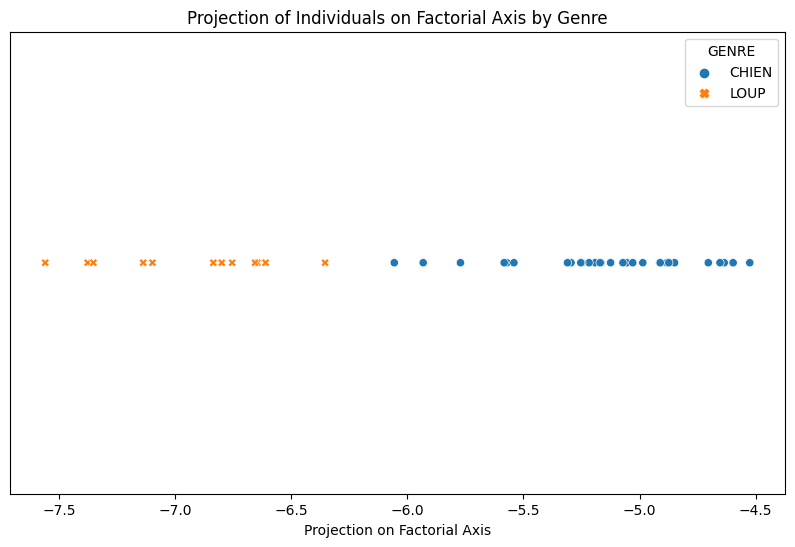

In [21]:
# Plotting the projections on a single axis with different colors for each genre
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_with_projections, x='Projection', y=[0]*data_with_projections.shape[0], hue='GENRE', style='GENRE')
plt.title('Projection of Individuals on Factorial Axis by Genre')
plt.xlabel('Projection on Factorial Axis')
plt.ylabel('')  # No Y-axis label needed as it's a one-dimensional plot
plt.yticks([])  # Remove Y-axis ticks
plt.show()

les résultats sont très bons!

on peut comparer nos résultats avec ceux d'un librairie bien connue.

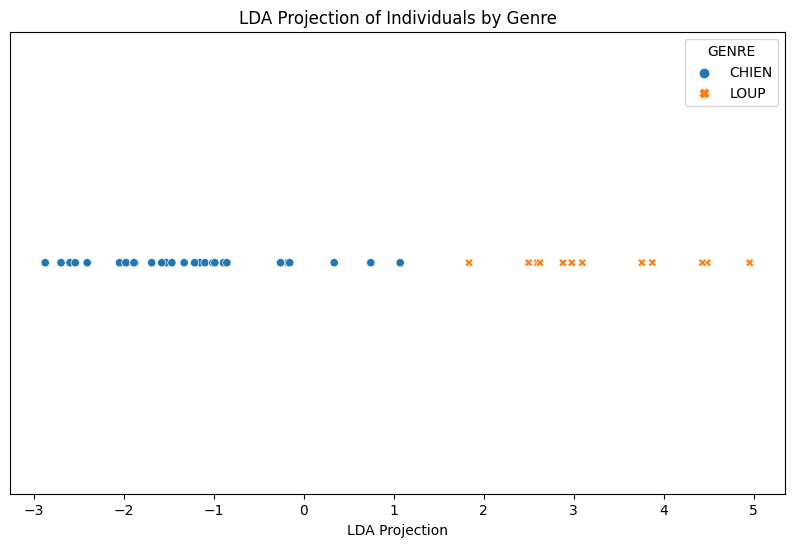

-0.017371632162881134

In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Preparing the data for AFD
X = data[numeric_columns]  # Independent variables
y = data['GENRE']  # Dependent variable (genre)

# Creating an instance of LDA
lda = LDA(n_components=1)

# Fitting the model and transforming the data
X_lda = lda.fit_transform(X, y)

# Adding the LDA projections to the dataframe
data_with_lda_projections = data.copy()
data_with_lda_projections['LDA_Projection'] = X_lda[:, 0]
# Plotting the LDA projections
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_with_lda_projections, x='LDA_Projection', y=[0]*data_with_lda_projections.shape[0], hue='GENRE', style='GENRE')
plt.title('LDA Projection of Individuals by Genre')
plt.xlabel('LDA Projection')
plt.ylabel('')  # No Y-axis label needed as it's a one-dimensional plot
plt.yticks([])  # Remove Y-axis ticks
plt.show()

# Comparing the two projection vectors
dot_product = np.dot(lda.coef_[0], a)
dot_product


le fais que les vecteurs sont dans des directions opposées étaient déja transcrit dans les deux plot. le produit scalire est assez faible: les vectuers sont proches.

In [27]:
# Inverse of the within-class scatter matrix W
W_inv = np.linalg.inv(W)

# Calculating V^-1B and W^-1B
V_inv_B = V_inv @ B
W_inv_B = W_inv @ B

# Eigenvalues and eigenvectors of V^-1B
eigenvalues_V_inv_B, eigenvectors_V_inv_B = np.linalg.eig(V_inv_B)

# Eigenvalues and eigenvectors of W^-1B
eigenvalues_W_inv_B, eigenvectors_W_inv_B = np.linalg.eig(W_inv_B)

# Preparing results for display
comparison_results = {
    "Eigenvalues of V^-1B": eigenvalues_V_inv_B,
    "Eigenvectors of V^-1B": eigenvectors_V_inv_B,
    "Eigenvalues of W^-1B": eigenvalues_W_inv_B,
    "Eigenvectors of W^-1B": eigenvectors_W_inv_B
}

comparison_results


{'Eigenvalues of V^-1B': array([ 8.16568927e-01+0.00000000e+00j,  1.12918676e-16+4.23589264e-16j,
         1.12918676e-16-4.23589264e-16j, -1.64093198e-16+8.68471931e-17j,
        -1.64093198e-16-8.68471931e-17j, -2.23734131e-18+0.00000000e+00j]),
 'Eigenvectors of V^-1B': array([[ 0.04608905+0.j        , -0.07254389-0.17004688j,
         -0.07254389+0.17004688j, -0.00622464+0.00080238j,
         -0.00622464-0.00080238j, -0.12180638+0.j        ],
        [-0.00256023+0.j        , -0.08035551+0.25270008j,
         -0.08035551-0.25270008j,  0.04353176-0.02132739j,
          0.04353176+0.02132739j,  0.16184409+0.j        ],
        [ 0.01989959+0.j        , -0.03326872+0.0349181j ,
         -0.03326872-0.0349181j ,  0.01668263-0.03259692j,
          0.01668263+0.03259692j,  0.46543082+0.j        ],
        [-0.96800802+0.j        ,  0.03962392-0.11080307j,
          0.03962392+0.11080307j, -0.42496434-0.0209902j ,
         -0.42496434+0.0209902j , -0.74131215+0.j        ],
        [-0.214

In [28]:
# Calculating the dot products between corresponding eigenvectors of V^-1B and W^-1B
dot_products = [np.dot(eigenvectors_V_inv_B[:, i], eigenvectors_W_inv_B[:, i]) for i in range(eigenvectors_V_inv_B.shape[1])]

dot_products

[(1+0j),
 (-0.014203819576582163+0.0328744230948986j),
 (-0.014203819576582163-0.0328744230948986j),
 (-0.968758484903497+0.0163818687686295j),
 (-0.7180503551959877+0.11958368541291747j),
 (-0.5434005917642369-0.06299884719994076j)]

Ces résultats montrent que les vecteurs propres des deux matrices ne sont pas identiques. Le produit scalaire entre les premiers vecteurs propres est très proche de 1, indiquant une forte similitude, mais les produits scalaires pour les autres paires de vecteurs propres varient considérablement, certains étant même complexes. Cela indique que, bien que les axes discriminants trouvés par V^-1*B et W^-1*B puissent être similaires dans certaines directions, ils ne sont pas identiques dans l'ensemble. ​

On comparant les valeurs propres de chacune on voit quelles sont, dans les deux  cas, nulles pour la pluspart sauf la premiere indiquant que seul une direction contribue à la séparation des classes. 

d'un point de vu théorique W^-1*B se concentre sur la minimisation de la variance intraclasse, tandis que V^-1*B tient compte de la variance totale (intra et interclasse).
Résultats: Les axes trouvés par W^-1*B pourraient être plus efficaces pour distinguer les classes dans des cas où la cohérence au sein des classes est cruciale. À l'inverse, V^-1*B pourrait fournir une meilleure séparation lorsque la variabilité totale est un facteur plus significatif.

Ainsi, l'équation de la combinaison linéaire pour le premier axe factoriel discriminant est :

y=(1.74797114×10^−3)×X1 −(9.70992320×10^−5)×X2 +(7.54711029×10^−4)×X3−(3.67126269×10^−2)×X4−(8.13170207×10^−3)×X5−(4.56091646×10^−3)×X6 où les Xi sont les variables numériques du dataset. Cette équation peut être utilisée pour projeter les données sur le premier axe factoriel discriminant, offrant ainsi une vue simplifiée des différences entre les groupes .

essaie de la librairire personnalisée

{'CHIEN': LCB      2006.000000
LSM      1035.000000
 LBM      714.000000
LP        197.000000
LM        137.066667
LAM       158.233333
dtype: float64, 'LOUP': LCB      2154.166667
LSM      1141.666667
 LBM      754.166667
LP        244.916667
LM        157.916667
LAM       192.833333
dtype: float64}


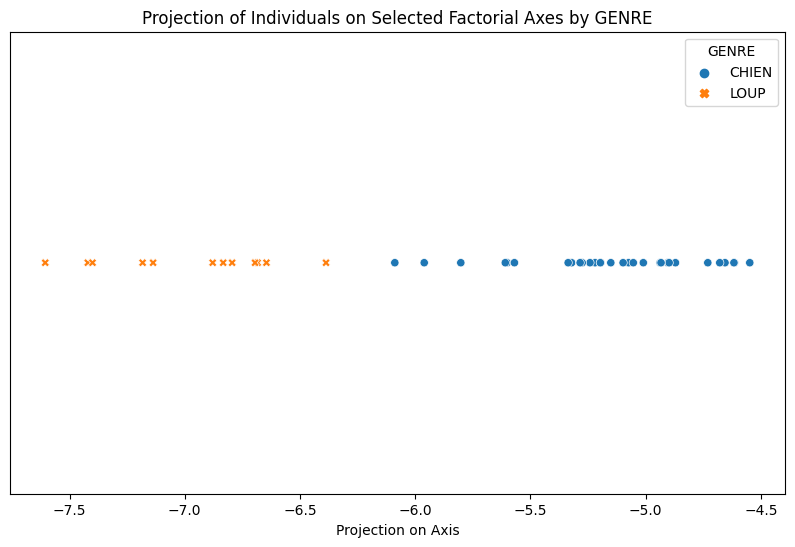

In [5]:
from afd import AFD

file_path = 'chienloup.csv'  # Ensure this path is correct
data = pd.read_csv(file_path, sep=';')  # Adjust the separator if needed

# Initialize the AFD object with the dataset and the target column
afd = AFD(data, 'GENRE')

# Compute the matrices B, W, and V
afd.compute_matrices()

# Compute the factorial axes
afd.compute_factorial_axis()

# Project the data onto a single axis (0th axis in this case)
afd.project_data(dimensions=0)

# Plot the projections
afd.plot_projections()

In [6]:
eigenvalues=afd.sorted_eigenvalues
sum_of_remaining = sum(eigenvalues) - eigenvalues[0]
quality = eigenvalues[0] / sum_of_remaining if sum_of_remaining != 0 else 0
quality

7418000343537214.0

il n'y a que deux classes donc c'est trivial, essayons avec 4 classes

{'BRIARD': LCB      2200.0
LSM      1165.0
 LBM      755.0
LP        215.0
LM        139.5
LAM       172.0
dtype: float64, 'DOGUE ALLEMAND': LCB      2430.00
LSM      1195.00
 LBM      852.50
LP        209.00
LM        149.50
LAM       177.25
dtype: float64, 'LEVRIER': LCB      2072.50
LSM      1115.00
 LBM      622.50
LP        198.25
LM        140.50
LAM       159.50
dtype: float64, 'LOUP': LCB      2154.166667
LSM      1141.666667
 LBM      754.166667
LP        244.916667
LM        157.916667
LAM       192.833333
dtype: float64}


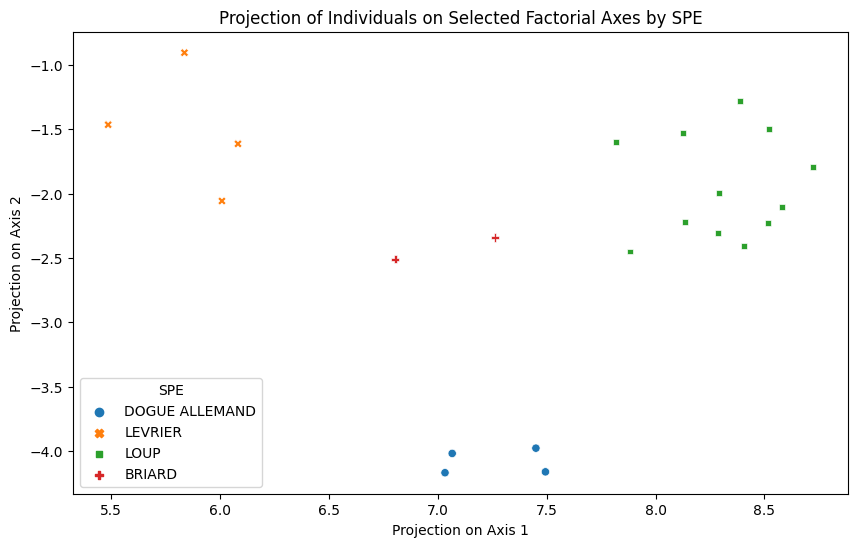

In [3]:
from afd import AFD

file_path = 'especes.csv'  # Ensure this path is correct
data = pd.read_csv(file_path, sep=';')  # Adjust the separator if needed

# Initialize the AFD object with the dataset and the target column
afd = AFD(data, 'SPE')

# Compute the matrices B, W, and V
afd.compute_matrices()

# Compute the factorial axes
afd.compute_factorial_axis()

# Project the data onto 2 axis
afd.project_data(dimensions=(0,1))

# Plot the projections
afd.plot_projections()

In [4]:
eigenvalues=afd.sorted_eigenvalues
qualities=[]
for i in range(3):
    sum_of_remaining = sum(eigenvalues) - eigenvalues[i]
    quality = eigenvalues[i] / sum_of_remaining if sum_of_remaining != 0 else 0
    qualities+=[quality]
qualities

[0.7608057904418044, 0.6741423158044662, 0.1979528237918861]

on observe bien que la qualités des differentes projection est de moins en moins bonne

In [20]:
import numpy as np

mean_vectors = afd.mean_vectors
sorted_eigenvectors = afd.sorted_eigenvectors
eigenvalues = afd.sorted_eigenvalues  # Assurez-vous que ceci est bien le nom de l'attribut pour les valeurs propres

# Calcul des contributions absolues pour chaque axe
contributions = []
contributions_relatives = []
n = len(data)  # Nombre total d'observations
V_inv = np.linalg.inv(afd.V).tolist()
# Conversion du dictionnaire mean_vectors en liste de vecteurs numpy
mean_vectors_list = [np.array(mean_vectors[key]) for key in mean_vectors]

for i in range(len(sorted_eigenvectors[0])):
    a = sorted_eigenvectors[:, i]   # Vecteur propre pour l'axe actuel
    for k, class_name in enumerate(mean_vectors):
        gk = mean_vectors_list[k]
        nk = sum(data['SPE'] == class_name)  # Nombre d'observations dans la classe k
        M = np.dot(a.T, np.dot(V_inv, gk.T))
        contribution = (nk / n) * np.square(M)
        contributions.append(contribution)
        # Calcul de la contribution relative
        contribution_relative = contribution / eigenvalues[i] if eigenvalues[i] != 0 else 0
        contributions_relatives.append(contribution_relative)

contributions_relatives, contributions


4


([2.911904672780214e-06,
  1.1210219114903575e-05,
  1.0397445422888161e-05,
  4.9392215680730455e-05,
  1.2151460927998024e-05,
  3.815207242913789e-05,
  3.342043604862095e-05,
  8.70120605292426e-05,
  0.003683505756662833,
  0.011697570115481844,
  0.011468144620366874,
  0.03366081195780025,
  -1.2520671944735552e-17,
  -3.7257848780852966e-17,
  -3.7168913630094646e-17,
  -1.0930642928228749e-16],
 [2.7230472719004185e-06,
  1.0483157935626609e-05,
  9.723098306819504e-06,
  4.618878475651314e-05,
  1.0590181061517777e-05,
  3.325010525818944e-05,
  2.9126412947951765e-05,
  7.583232016302405e-05,
  0.0013173434440654896,
  0.004183437822854722,
  0.004101387680447723,
  0.012038219262809824,
  1.3900738276823646e-33,
  4.136452156450528e-33,
  4.1265783712434885e-33,
  1.21354514528757e-32])

Variabilité des Contributions : Les contributions varient considérablement, allant de valeurs très faibles (proches de zéro) à des valeurs relativement élevées. Cela indique une différence marquée dans l'importance des différents axes pour la séparation des classes.

contributions relatives:

Axes Dominants : Certains axes ont montré des contributions significativement plus élevées, indiquant qu'ils sont plus influents dans la distinction des classes. Par exemple, les contributions de l'ordre de 0.004 et 0.012 sont remarquablement plus élevées que les autres, suggérant que ces axes sont particulièrement pertinents pour comprendre la séparation des classes. On distingue ainsi l'axe 3 qui contient les 4 contributions absolues les plus importantes.

Axes Moins Pertinents : À l'inverse, les contributions extrêmement faibles suggèrent que certains axes, comme le 3eme, contribuent très peu à la séparation des classes et peuvent être considérés comme négligeables pour l'analyse.

Les contribution absolus sont plus faibles. Difficile d'interpréter davantage.